解压数据集

In [63]:
!unzip -o data/used_car_testA.zip -d data
!unzip -o data/used_car_testB.zip -d data
!unzip -o data/used_car_train.zip -d data

Archive:  data/used_car_testA.zip
  inflating: data/used_car_testA.csv  
Archive:  data/used_car_testB.zip
  inflating: data/used_car_testB.csv  
Archive:  data/used_car_train.zip
  inflating: data/used_car_train.csv  


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

读取数据

In [65]:
train = pd.read_csv('./data/used_car_train.csv', sep=' ')
testA = pd.read_csv('./data/used_car_testA.csv', sep=' ')
testB = pd.read_csv('./data/used_car_testB.csv', sep=' ')

- SaleID - 交易ID，唯一编码
- name - 汽车交易名称 
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v_0', 'v_1', ..., 'v_14' - 匿名特征，包含v0-14在内15个匿名特征

In [66]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [67]:
testA.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [68]:
train_numeric_features = [
    'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
    'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'
]
train[train_numeric_features].describe()

,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,119.316547,12.597160,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,177.168419,3.919576,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.500000,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,75.000000,12.500000,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,110.000000,15.000000,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,150.000000,15.000000,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,19312.000000,15.000000,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [70]:
test_numeric_features = [
    'power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
    'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'
]

In [71]:
testA[test_numeric_features].describe()

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,119.883620,12.595580,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,185.097387,3.908979,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,0.000000,0.500000,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,75.000000,12.500000,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,109.000000,15.000000,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,150.000000,15.000000,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,20000.000000,15.000000,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [72]:
testB[test_numeric_features].describe()

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,119.766960,12.598260,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,206.313348,3.912519,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,0.000000,0.500000,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,75.000000,12.500000,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,110.000000,15.000000,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,150.000000,15.000000,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,19211.000000,15.000000,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


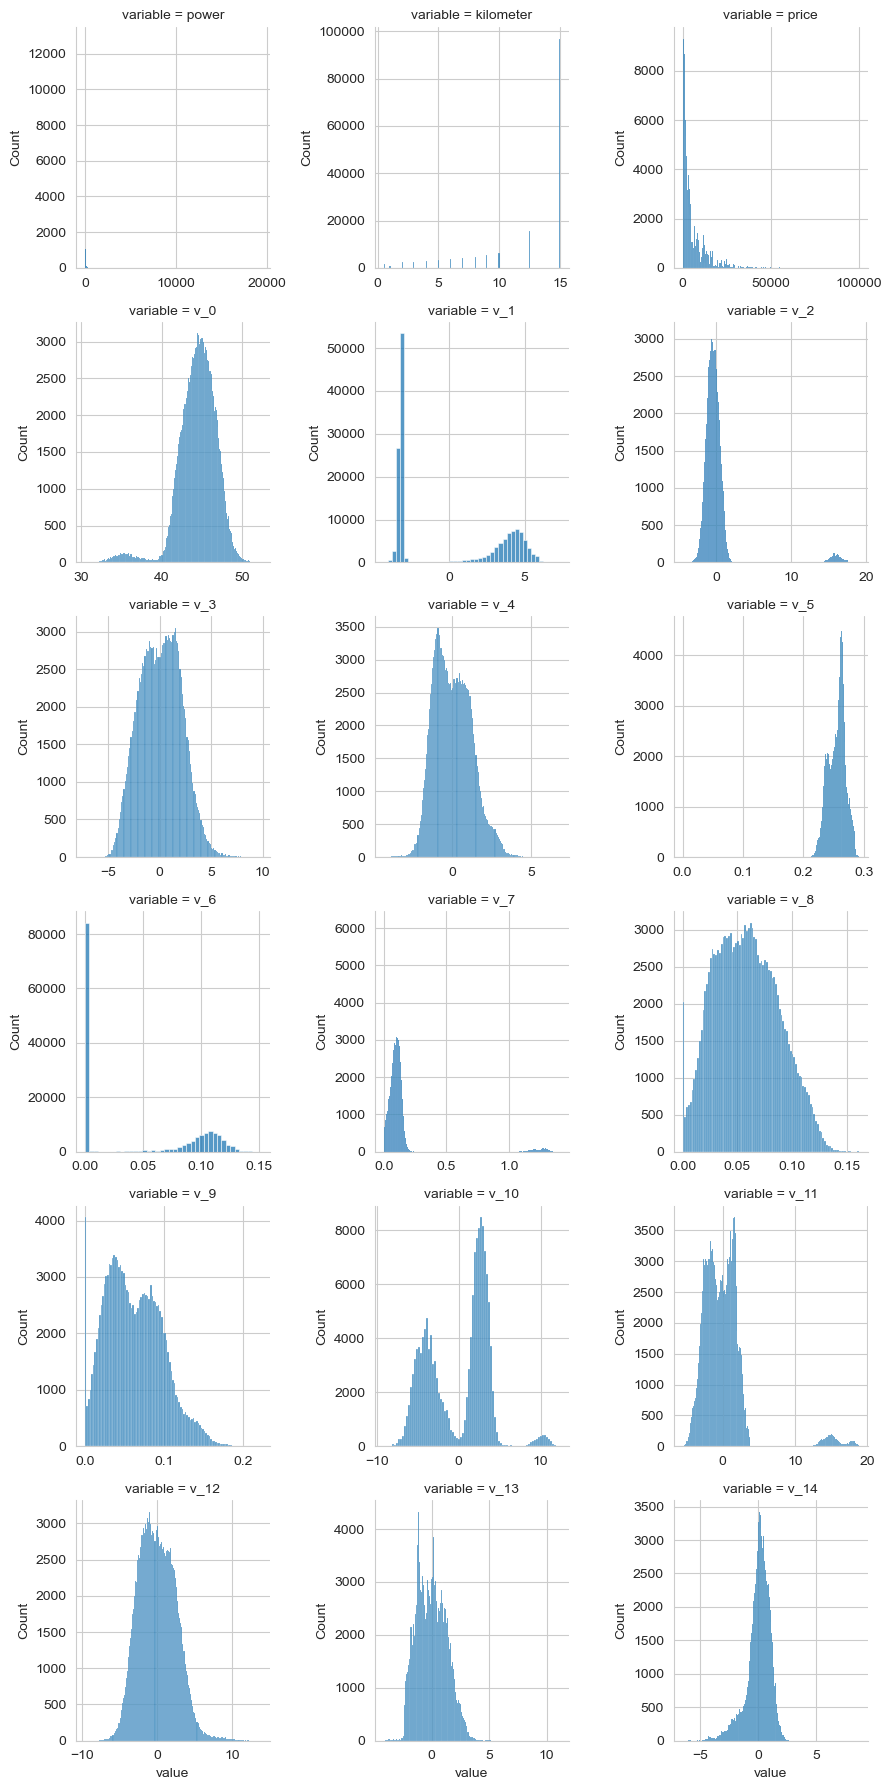

In [73]:
# 绘制数值特征的分布
f_train = pd.melt(train, value_vars=train_numeric_features)
g_train = sns.FacetGrid(f_train, col="variable", col_wrap=3, sharex=False, sharey=False)
g_train = g_train.map(sns.histplot, "value")
plt.show()

price字段存在长尾分布，需要对其进行处理
power字段存在异常值，需要对其进行处理

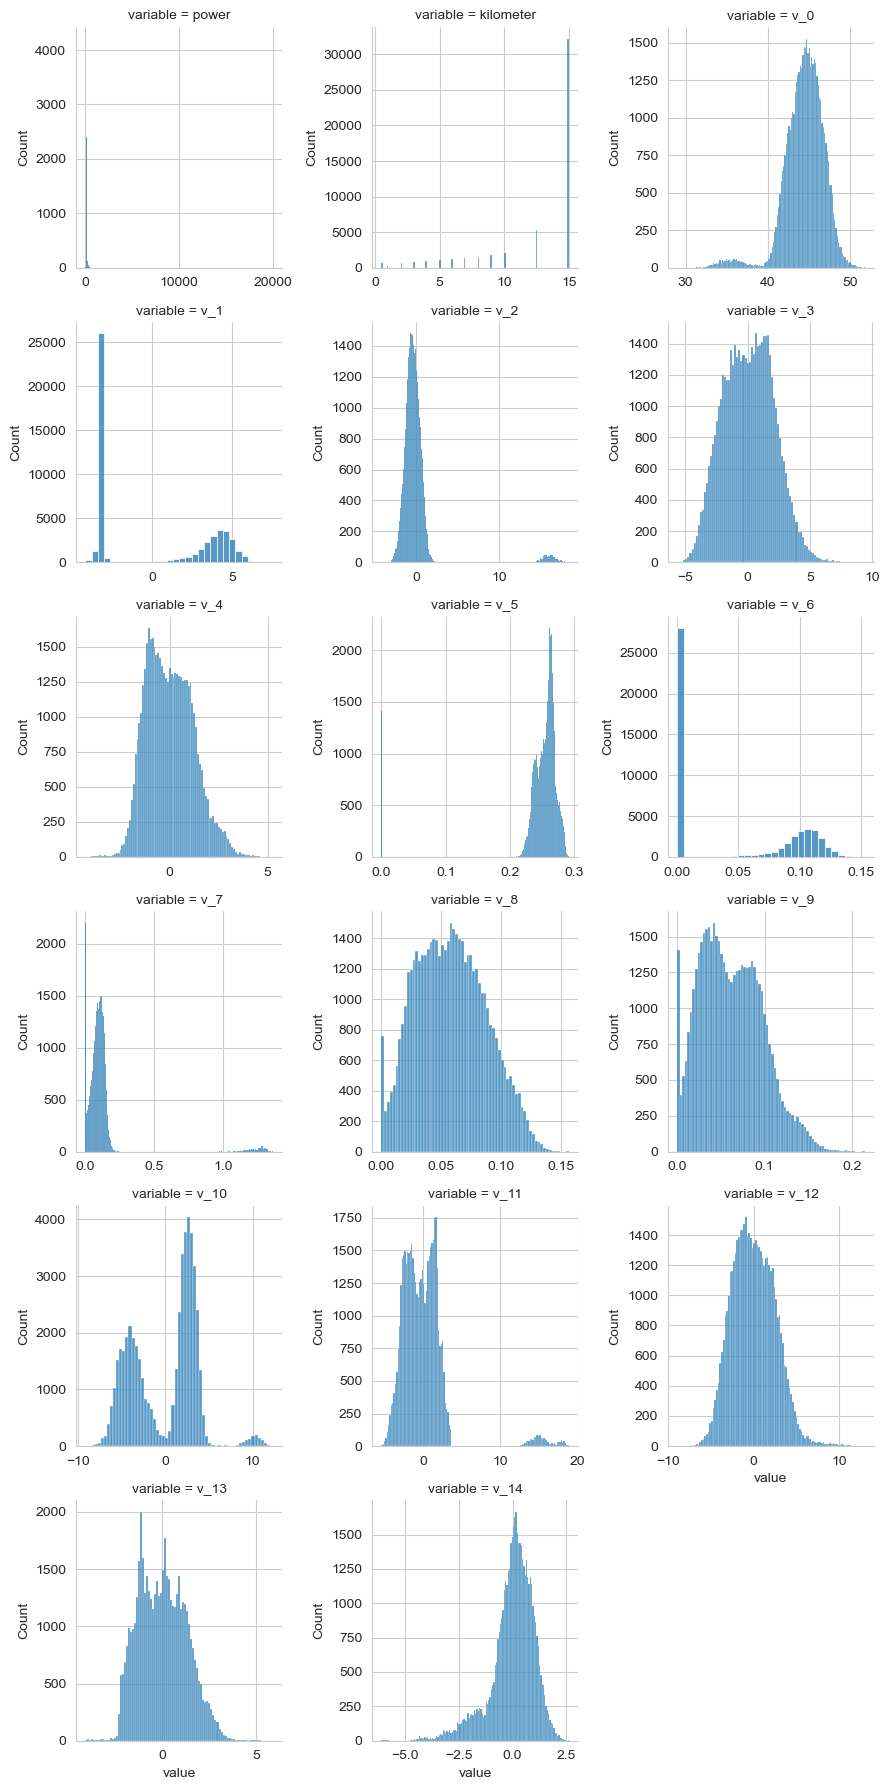

In [74]:
f_test = pd.melt(testA, value_vars=test_numeric_features)
g_test = sns.FacetGrid(f_test, col="variable", col_wrap=3, sharex=False, sharey=False)
g_test = g_test.map(sns.histplot, "value")
plt.show()

In [75]:
category_features = [
    'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
    'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'regionCode'
]
for feature in category_features:
    print(feature + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(feature, train[feature].nunique()))
    print(train[feature].value_counts())
    print(36 * '-')

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
119983      1
63443       1
104410      1
154956      1
177672      1
Name: name, Length: 99662, dtype: int64
------------------------------------
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
------------------------------------
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23  

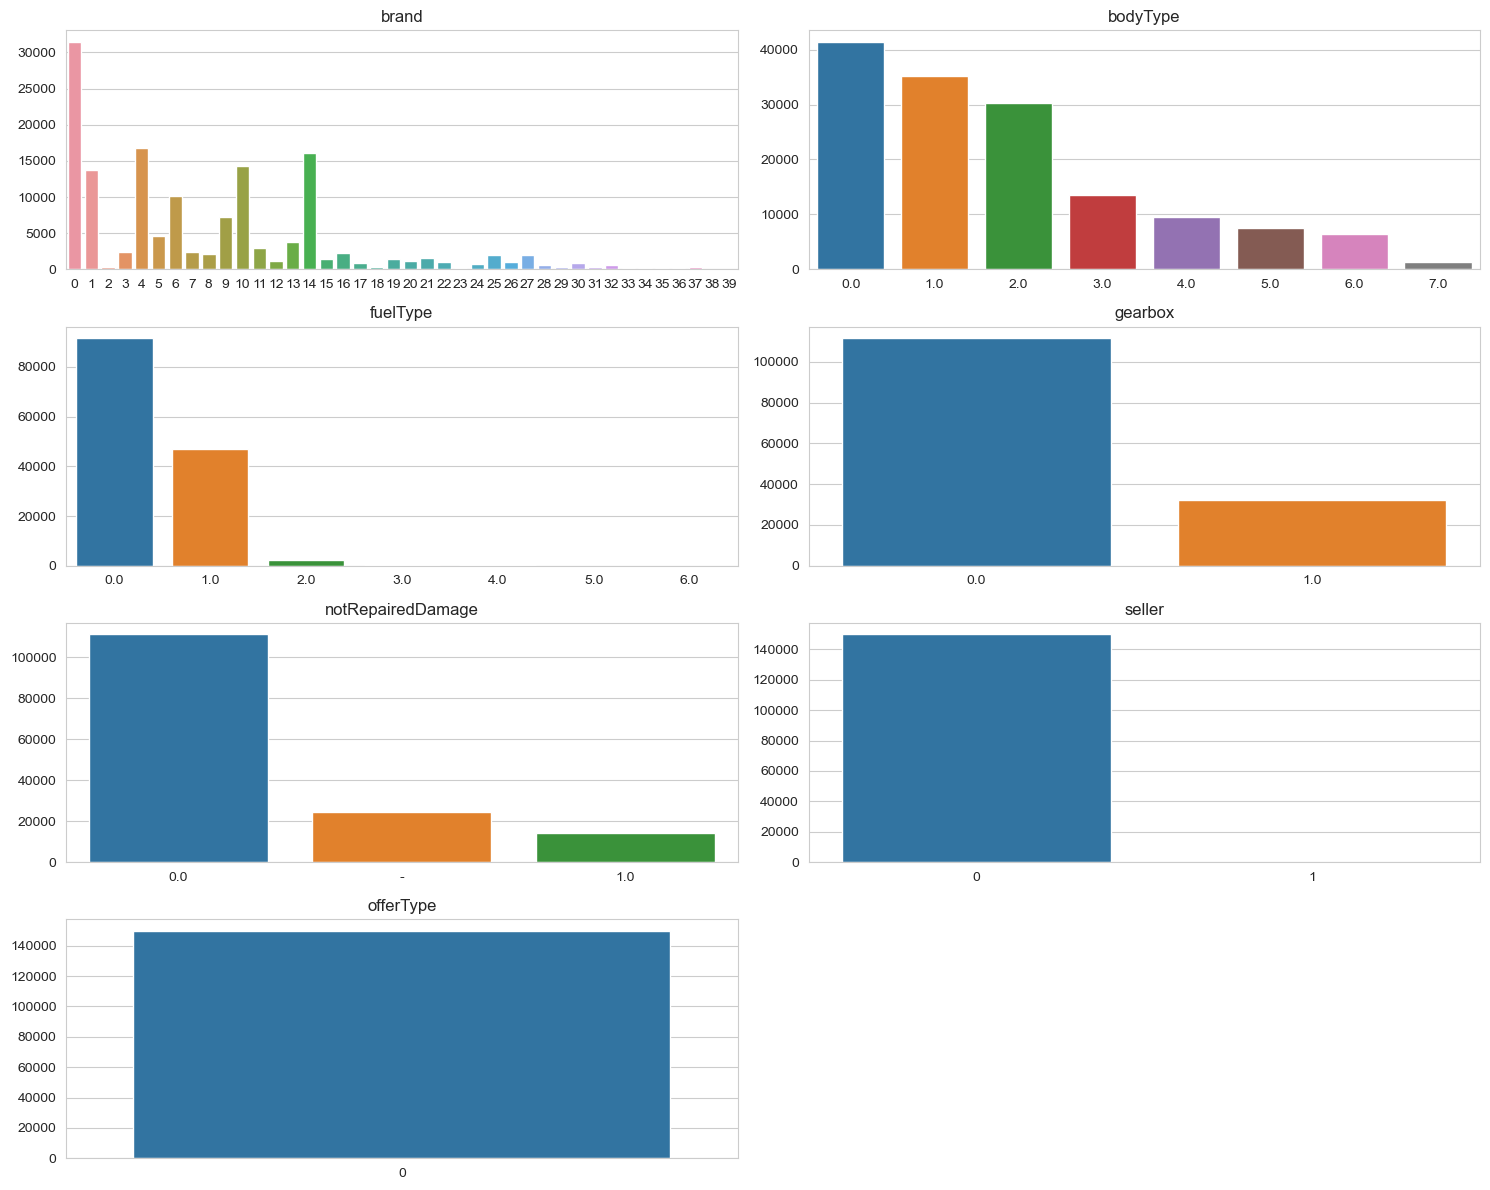

In [76]:
plt.figure(figsize=(15, 12))
i = 1
for feature in category_features:
    if train[feature].nunique() < 50:
        plt.subplot(4, 2, i)
        i += 1
        v = train[feature].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        plt.title(feature)
plt.tight_layout()
plt.show()

## 数据缺失值处理

In [77]:
train['notRepairedDamage'].replace('-', np.nan, inplace=True)
testA['notRepairedDamage'].replace('-', np.nan, inplace=True)
testB['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [78]:
train.isnull().sum()[train.isnull().sum() > 0]

model                    1
bodyType              4506
fuelType              8680
gearbox               5981
notRepairedDamage    24324
dtype: int64

In [79]:
testA.isnull().sum()[testA.isnull().sum() > 0]

bodyType             1413
fuelType             2893
gearbox              1910
notRepairedDamage    8031
dtype: int64

In [80]:
testB.isnull().sum()[testB.isnull().sum() > 0]

bodyType             1504
fuelType             2924
gearbox              1968
notRepairedDamage    8069
dtype: int64

## 相关性分析

In [81]:
# 对price属性进行相关性分析
price_numeric = train[train_numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending=False), '\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



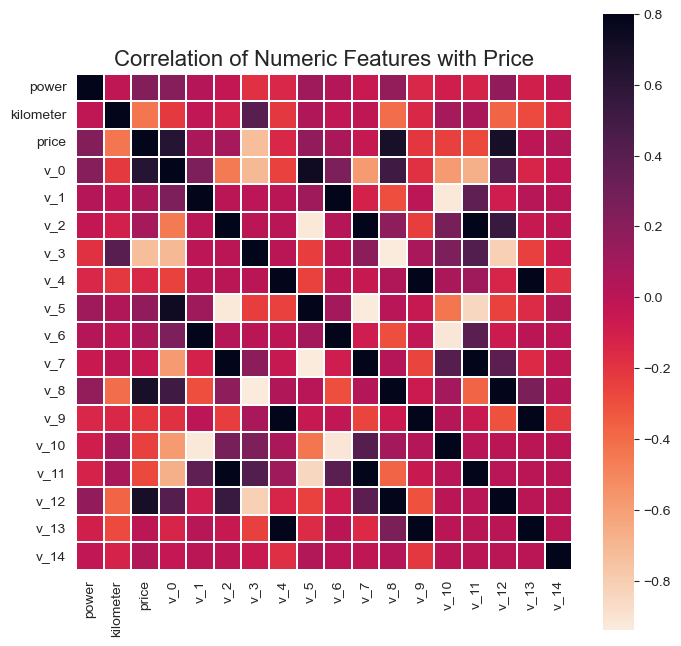

In [82]:
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Correlation of Numeric Features with Price', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, linewidths=0.1, cmap=sns.cm.rocket_r)
plt.show()

v_0, v_8, v_12 相关性较高

## 数据预处理

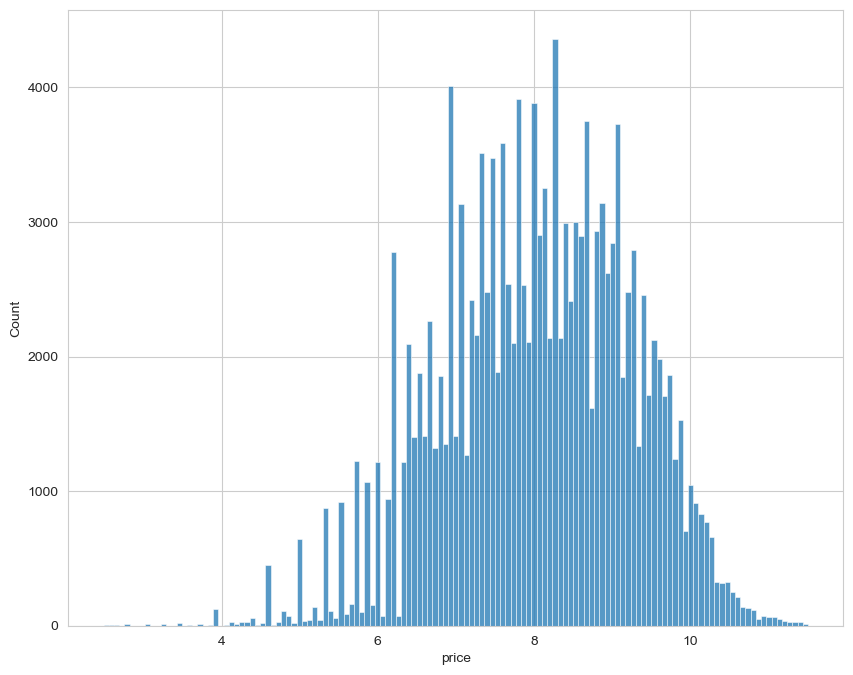

In [83]:
# 对price进行对数变换
train['price'] = np.log1p(train['price'])

plt.figure(figsize=(10, 8))
sns.histplot(train['price'])
plt.show()

In [84]:
train['power'].describe()

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

In [85]:
# 合并训练数据和测试数据，方便后续数据预处理
df = pd.concat([train, testA, testB], axis=0, ignore_index=True)
df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [86]:
# 删除不需要的特征
# df.drop(['SaleID', 'name'], axis=1, inplace=True)
# 删除seller中的特殊样本
df = df[df['seller'] != 1]
# seller 和 offerType 属性的取值都是一样的，可以删除
df.drop(['seller', 'offerType'], axis=1, inplace=True)

In [87]:
# 处理异常值
df['power'] = df['power'].map(lambda x: 600 if x > 600 else x)

df['power'].describe()

count    249999.000000
mean        116.825555
std          70.241225
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         600.000000
Name: power, dtype: float64

In [88]:
# 查看缺失值
df.isnull().sum()[df.isnull().sum() > 0]

model                     1
bodyType               7423
fuelType              14497
gearbox                9859
notRepairedDamage     40423
price                100000
dtype: int64

In [89]:
# 用众数填充缺失值
df.fuelType.fillna(df.fuelType.mode()[0], inplace=True)
df.gearbox.fillna(df.gearbox.mode()[0], inplace=True)
df.bodyType.fillna(df.bodyType.mode()[0], inplace=True)
df.model.fillna(df.model.mode()[0], inplace=True)
df.notRepairedDamage.fillna(df.notRepairedDamage.mode()[0], inplace=True)

In [90]:
df.isnull().sum()[df.isnull().sum() > 0]

price    100000
dtype: int64

In [91]:
from datetime import datetime


def date_process(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:8])

    if month < 1:
        month = 1

    date = datetime(year, month, day)
    return date

In [92]:
df['regDates'] = df['regDate'].apply(date_process)
df['creatDates'] = df['creatDate'].apply(date_process)
df['regDate_year'] = df['regDates'].dt.year
df['regDate_month'] = df['regDates'].dt.month
df['regDate_day'] = df['regDates'].dt.day
df['creatDate_year'] = df['creatDates'].dt.year
df['creatDate_month'] = df['creatDates'].dt.month
df['creatDate_day'] = df['creatDates'].dt.day

In [93]:
# 切割数据，导出数据
output_path = './process_data/'
print(df.shape)
train_num = df.shape[0] - 100000
df[:int(train_num)].to_csv(output_path + 'train_data_v1.csv', index=False, sep=' ')
df[train_num:train_num + 50000].to_csv(output_path + 'testA_data_v1.csv', index=False, sep=' ')
df[train_num + 50000:].to_csv(output_path + 'testB_data_v1.csv', index=False, sep=' ')

(249999, 37)
